In [1]:
import sys
sys.path.append('../functions')
from barcodes import get_data, ripser_barcode
from landscapes import persistence_landscape, plot_pl, average_list
sys.path.append('../classes')
from protein import Protein

<h3>Non-Redundant Trefoil Knots</h3>

In [92]:
file_name = "../data/31_non_red.txt"
with open(file_name, "r") as f:
    rows = f.readlines()[1:]
protein_data = [Protein(*row.split(';')[:4]) for row in rows]

In [17]:
protein_3kzn = Protein('3kzn', 'A', 'K', '+3.1')
protein_4k1c = Protein('4k1c', 'A', 'K', '+3.1')
proteins = [protein_3kzn, protein_4k1c]

Fetch the data from knotprot

In [20]:
for protein in proteins:
    data = get_data(pdbid = protein.pdbid, chain = protein.chain)
    protein.add_data(data)

Compute barcodes

In [22]:
for protein in proteins:
    barcode = ripser_barcode(protein.data)
    protein.add_barcode(barcode)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Compute persistence landscapes

In [23]:
# choose a degree
h=1
for protein in proteins:
    pl = persistence_landscape(protein.barcode[h])
    protein.add_pl(pl)

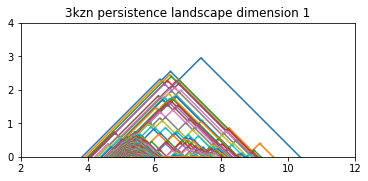

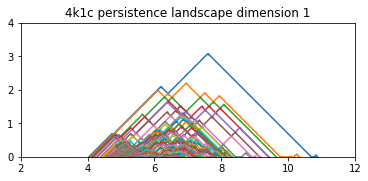

In [25]:
plot_pl(proteins[0].pl, title = "3kzn persistence landscape dimension 1")
plot_pl(proteins[1].pl, title = "4k1c persistence landscape dimension 1")

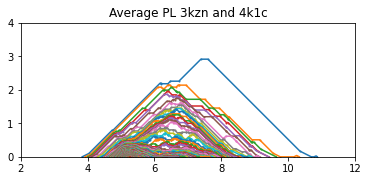

In [26]:
average_landscape = average_list([protein.pl for protein in proteins])
plot_pl(average_landscape, title = "Average PL of 3kzn and 4k1c in dimension 1")

Dimension 2

In [27]:
h=2
dimension_2_pls = []
for protein in proteins:
    pl = persistence_landscape(protein.barcode[h])
    dimension_2_pls.append(pl)

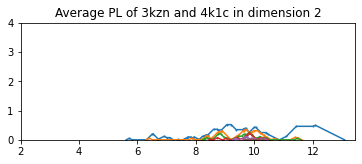

In [28]:
average_landscape_dim_2 = average_list(dimension_2_pls)
plot_pl(average_landscape_dim_2, xu = None,  title = "Average PL of 3kzn and 4k1c in dimension 2")